In [1]:
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime


In [35]:
resp = requests.get("https://data.ratp.fr/api/records/1.0/search/"
                    "?dataset=qualite-de-lair-mesuree-dans-la-station-chatelet&rows=58887&facet=dateheure")

In [3]:
id_dataset = "qualite-de-lair-mesuree-dans-la-station-chatelet"
nb_rows = -1
start = 0 

# Get certain records

In [97]:
req = "https://data.ratp.fr/api/v2/catalog/datasets/"\
"{}/"\
"records?rows={}&start={}&pretty=false&timezone=UTC".format(id_dataset,nb_rows,start)
resp = requests.get(req)

In [88]:
nb_data = int(json.loads(resp.content)["total_count"])
datas = []
for i in range(nb_data//nb_rows) :
    print("Step",i,"over",nb_data//nb_rows)
    req = "https://data.ratp.fr/api/v2/catalog/datasets/"\
    "{}/"\
    "records?rows={}&start={}&pretty=false&timezone=UTC".format(id_dataset,nb_rows,start+i*nb_rows)
    resp = requests.get(req)
    datas.append(json.loads(resp.content))

KeyError: 'total_count'

# Exports datasets (json,csv, ...)

In [4]:
req = "https://data.ratp.fr/api/v2/catalog/datasets/"\
"{}/"\
"exports/json?rows={}&timezone=UTC".format(id_dataset,nb_rows)
resp = requests.get(req)

 # Exploitation with pandas

In [5]:
t = json.loads(resp.content)

In [44]:
df = pd.DataFrame(json.loads(resp.content))

In [45]:
df["dateheure"] = df["dateheure"].apply(lambda x : datetime.strptime(x[:-6],"%Y-%m-%dT%H:%M:%S"))
df["year"] = df["dateheure"].apply(lambda x : x.year)
df["month"] = df["dateheure"].apply(lambda x : x.month)
df["day"] = df["dateheure"].apply(lambda x : x.day)

In [68]:
means_per_day = df.groupby(["year","month","day"]).mean()

c2cha4


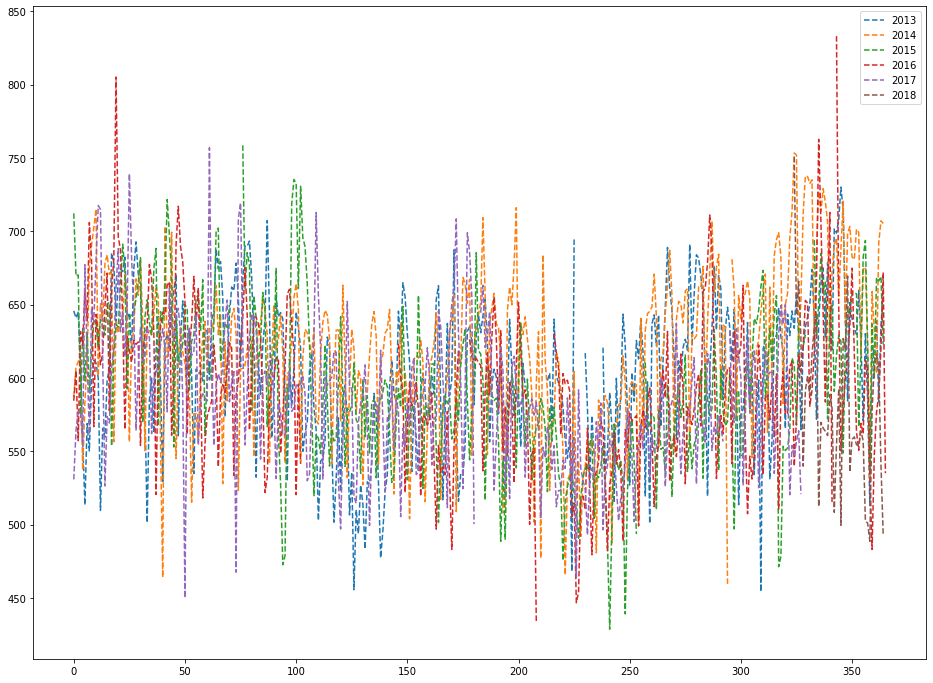

tcha4


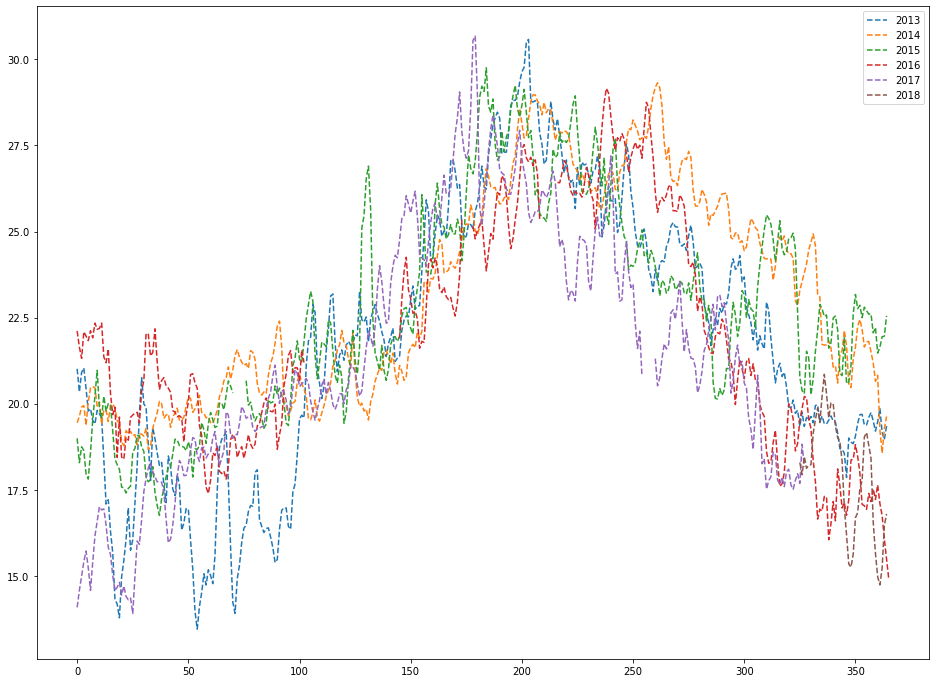

hycha4


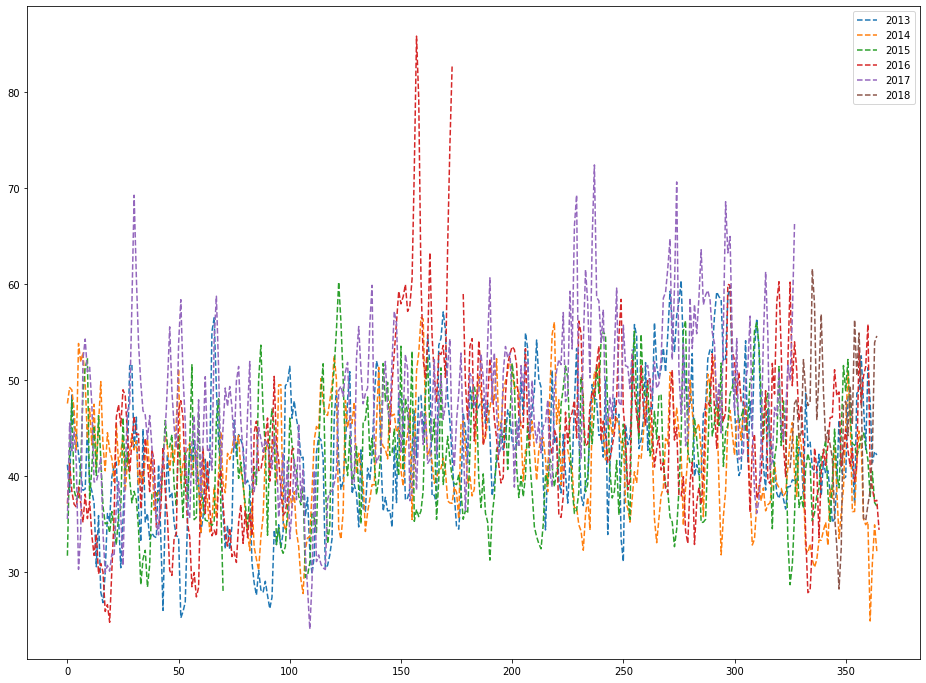

10cha4


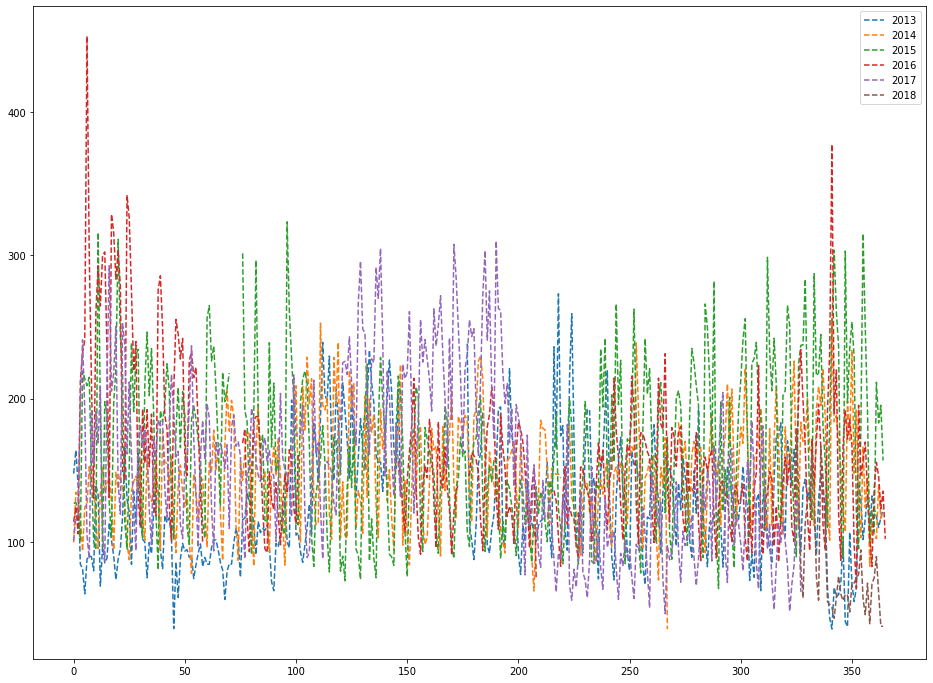

n2cha4


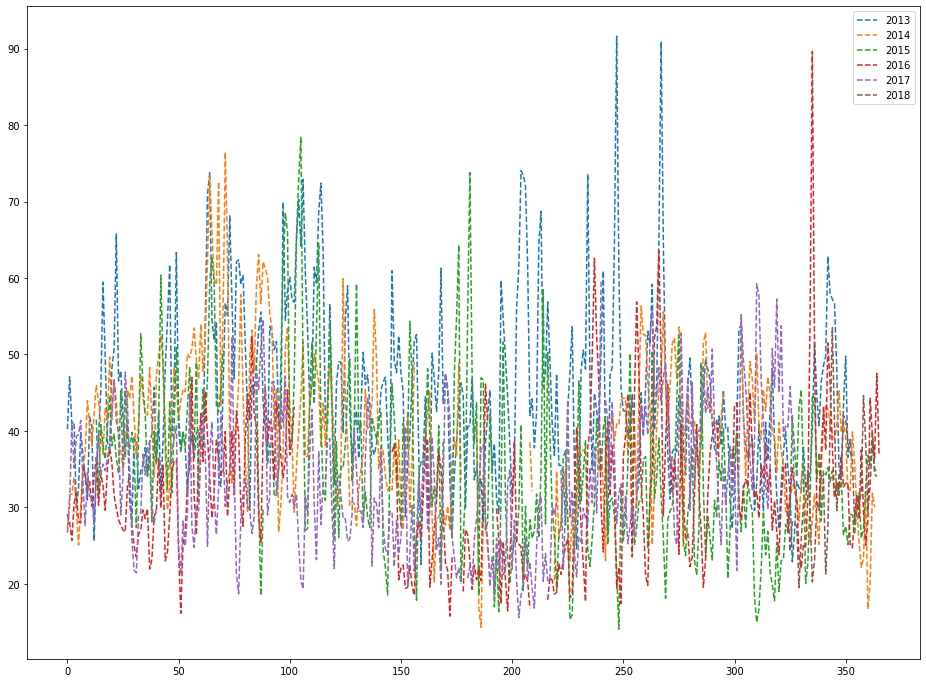

nocha4


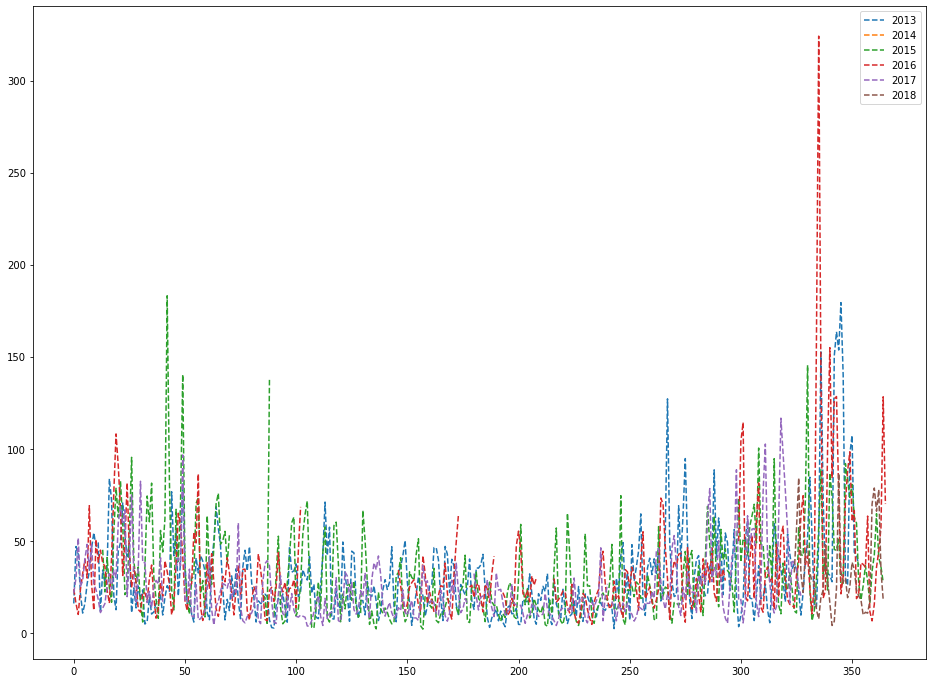

In [144]:
for k in means_per_day.keys() : 
    print(k)
    plt.figure(figsize=(16,12))
    for y in list(range(2013,2019)) :
        plt.plot(list(means_per_day.loc[y][k]),"--")

    plt.legend(("2013","2014","2015","2016","2017","2018"))
    plt.show()

In [150]:
means_per_day.loc[2013]["tcha4"].mean(
)

month  day
1      1      21.013043
       2      20.345833
       3      20.908333
       4      21.037500
       5      20.441667
                ...    
12     27     19.479167
       28     19.858333
       29     19.175000
       30     18.958333
       31     19.354167
Name: tcha4, Length: 365, dtype: float64